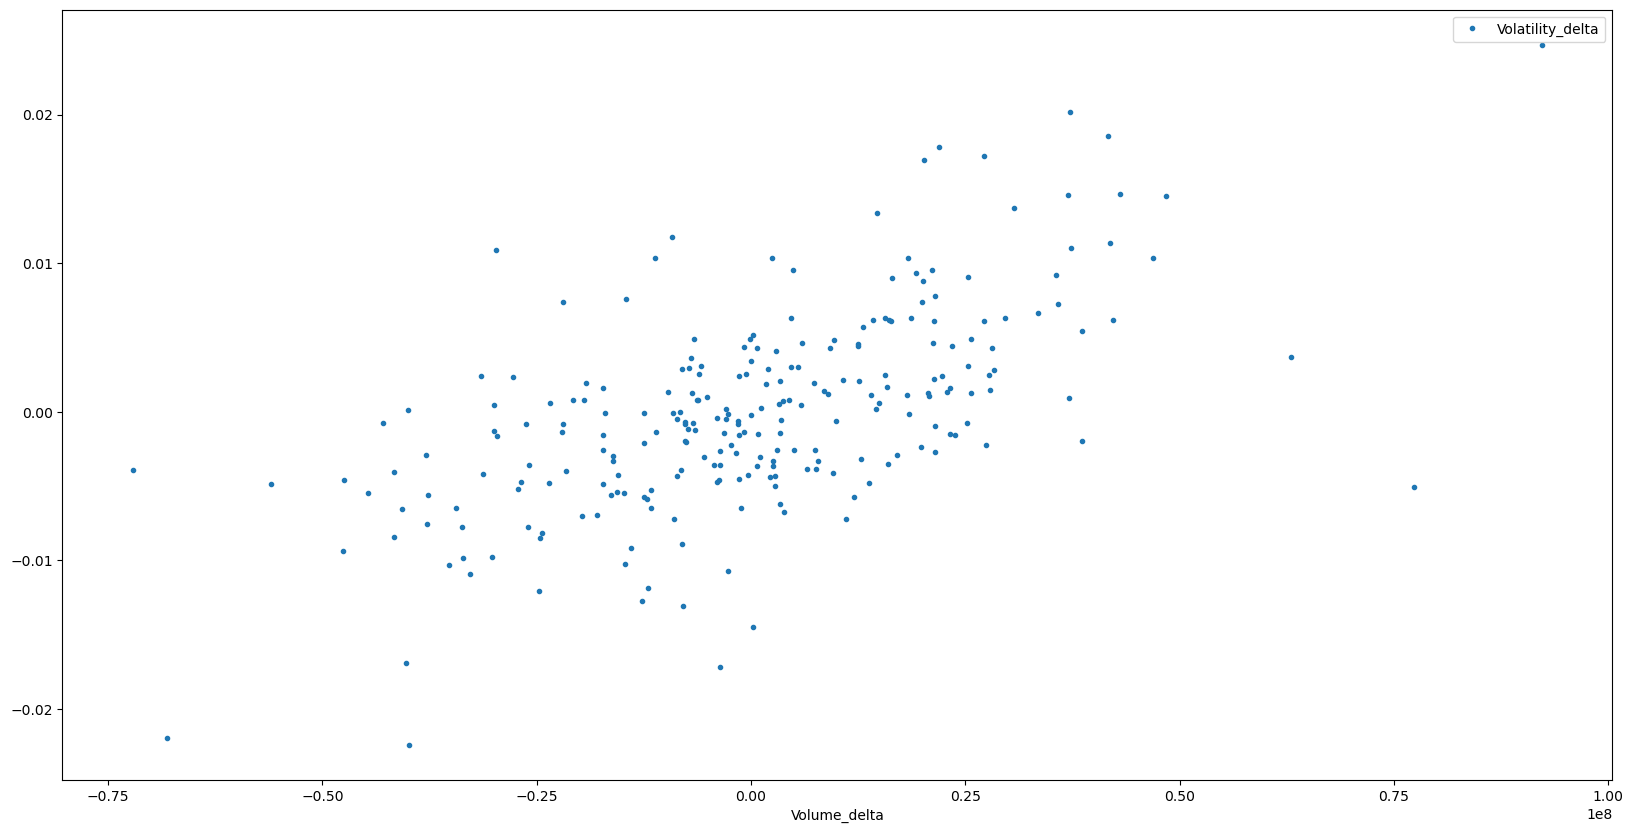

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]


SPY = pd.read_csv('https://raw.githubusercontent.com/ktxdev/AIM-5003/main/Midterm%20Project/SPY.csv')

SPY['Volatility'] = (SPY['High'] - SPY['Low']) / SPY['Close']

SPY['Volume_delta'] = SPY['Volume'].diff()

SPY['Volatility_delta'] = SPY['Volatility'].diff()

SPY.plot(x='Volume_delta', y='Volatility_delta', style='.')

SPY['Volume_delta'] = SPY['Volume_delta'].fillna(0)
SPY['Volatility_delta'] = SPY['Volatility_delta'].fillna(0)

### Describing relationship between intraday volatility vs volume

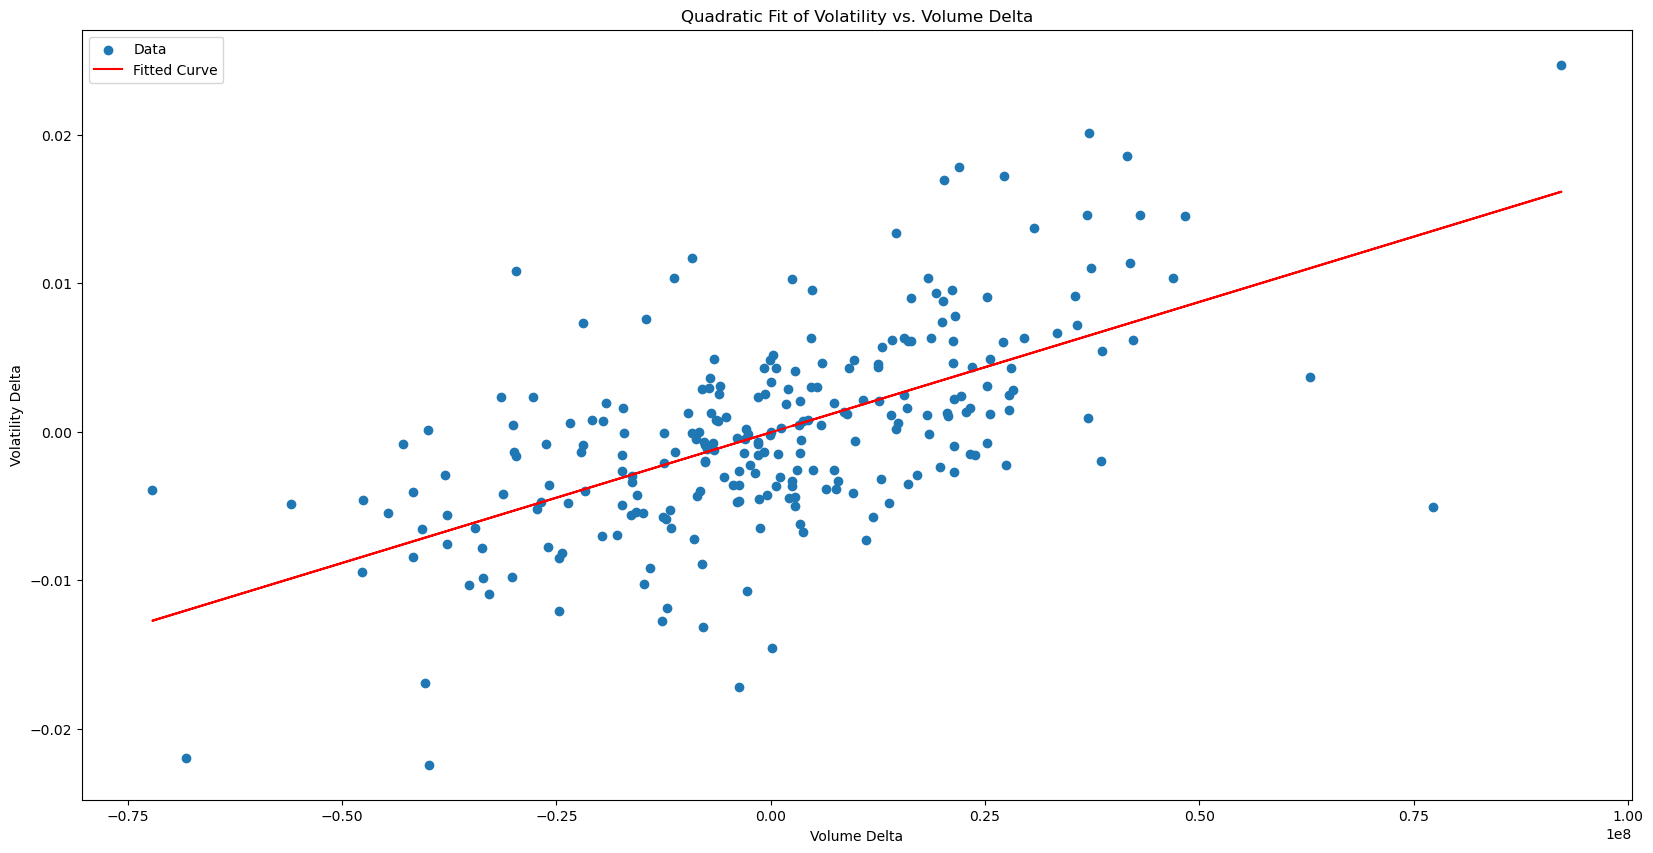

R-squared: 0.36923552870536724


In [28]:
from scipy.optimize import curve_fit

# Define the linear function
def linear_function(x, m, b):
    return m * x + b

# Initial coefficients
initial = [-0.5, -0.25]

# Fit the model to the data
optimal_params, covariance = curve_fit(linear_function, SPY['Volume_delta'], SPY['Volatility_delta'], p0 = initial)

# Predict intraday volatility using the fitted model
predicted_volatility = linear_function(SPY['Volume_delta'], *optimal_params)

# Plot the data and the fitted curve
plt.scatter(SPY['Volume_delta'], SPY['Volatility_delta'], label='Data')
plt.plot(SPY['Volume_delta'], predicted_volatility, color='red', label='Fitted Curve')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.title('Quadratic Fit of Volatility vs. Volume Delta')
plt.legend()
plt.show()

### Testing Using the last 5 years data

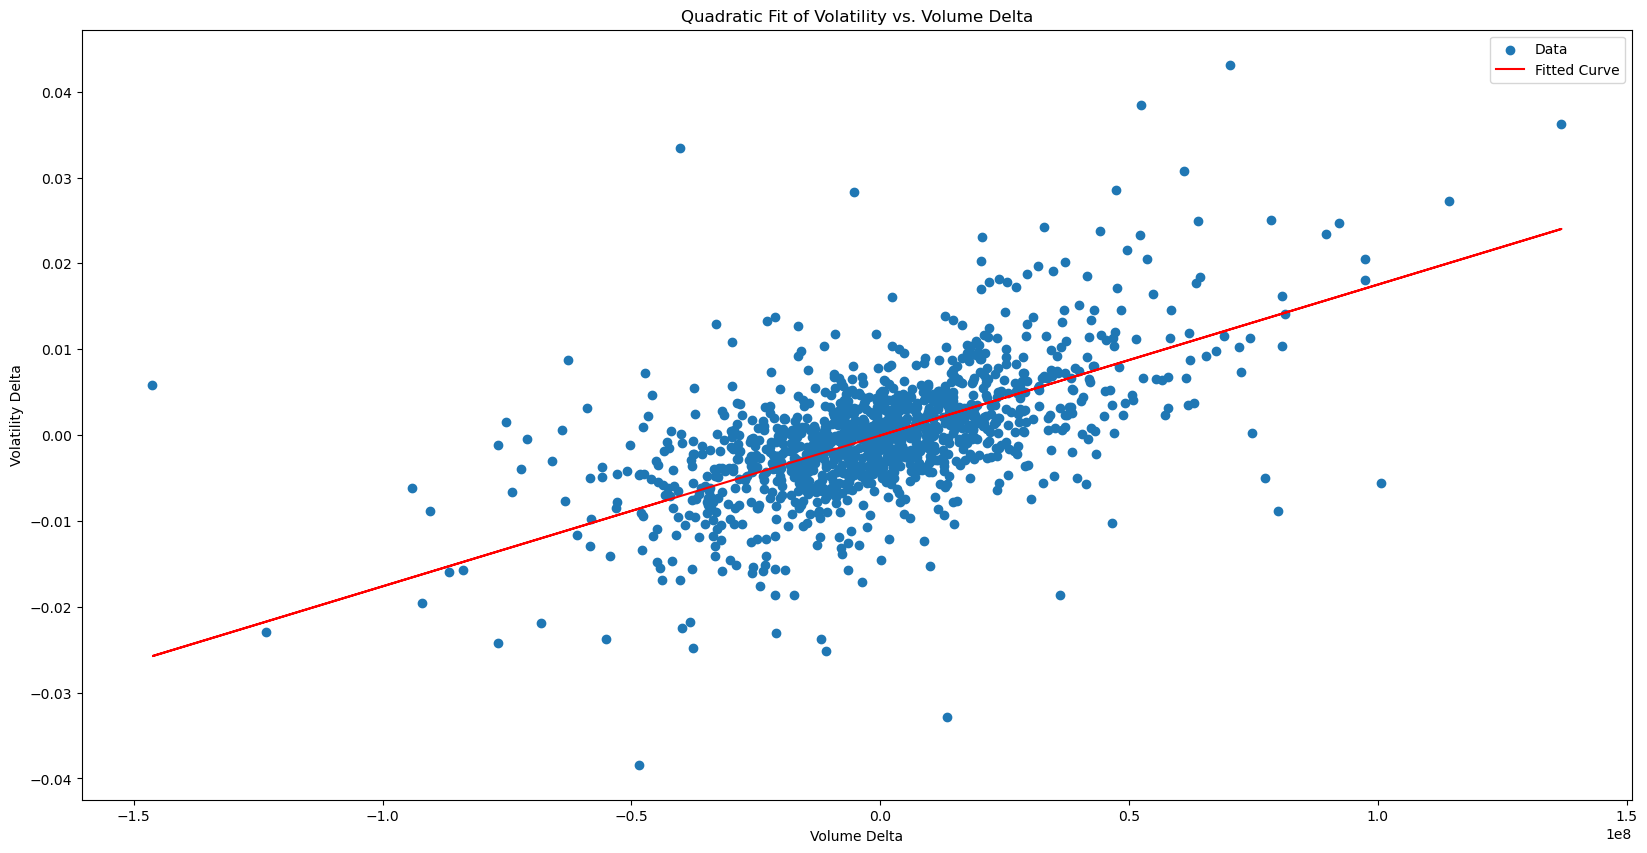

R-squared: 0.3337168633810489


In [33]:
SPY = pd.read_csv('https://raw.githubusercontent.com/ktxdev/AIM-5003/main/Midterm%20Project/SPY_5_years.csv')

SPY['Volatility'] = (SPY['High'] - SPY['Low']) / SPY['Close']

SPY['Volume_delta'] = SPY['Volume'].diff()

SPY['Volatility_delta'] = SPY['Volatility'].diff()

SPY['Volume_delta'] = SPY['Volume_delta'].fillna(0)
SPY['Volatility_delta'] = SPY['Volatility_delta'].fillna(0)

# Predict intraday volatility using the fitted model
predicted_volatility = linear_function(SPY['Volume_delta'], *optimal_params)

# Plot the data and the fitted curve
plt.scatter(SPY['Volume_delta'], SPY['Volatility_delta'], label='Data')
plt.plot(SPY['Volume_delta'], predicted_volatility, color='red', label='Fitted Curve')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.title('Quadratic Fit of Volatility vs. Volume Delta')
plt.legend()
plt.show()

# Using R-squared to test how well the data fits
residuals = SPY['Volatility_delta'] - predicted_volatility
sum_squared_residuals = np.sum(residuals ** 2)
sum_squared_total = np.sum((SPY['Volatility_delta'] - np.mean(SPY['Volatility_delta'])) ** 2)
r_squared = 1 - (sum_squared_residuals / sum_squared_total)
print("R-squared:", r_squared)